In [1]:
from bayes import Bayes         # for Bayes
import numpy as np              # for linspace
import scipy.stats as stats     # for binom, uniform
import matplotlib.pyplot as plt # for plot

%matplotlib inline

## Yesterday's Coin example

In [2]:
# here we're discretizing the heads probability p
p = np.linspace(0, 1, 101)

In [3]:
p

array([ 0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,
        0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,
        0.18,  0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,
        0.27,  0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,
        0.36,  0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,
        0.45,  0.46,  0.47,  0.48,  0.49,  0.5 ,  0.51,  0.52,  0.53,
        0.54,  0.55,  0.56,  0.57,  0.58,  0.59,  0.6 ,  0.61,  0.62,
        0.63,  0.64,  0.65,  0.66,  0.67,  0.68,  0.69,  0.7 ,  0.71,
        0.72,  0.73,  0.74,  0.75,  0.76,  0.77,  0.78,  0.79,  0.8 ,
        0.81,  0.82,  0.83,  0.84,  0.85,  0.86,  0.87,  0.88,  0.89,
        0.9 ,  0.91,  0.92,  0.93,  0.94,  0.95,  0.96,  0.97,  0.98,
        0.99,  1.  ])

In [4]:
p_priors = { k:1/101 for k in p}

In [5]:
#p_priors

In [6]:
bool(1)

True

In [7]:
def coin_likelihood(data, p):
    # what is the likelihood of drawing data
    # given that the heads probability is p
    # data = 0 for tails, 1 for heads
    if data:
        return p
    return 1-p

I'm now creating an instance of that same `Bayes` object you used.

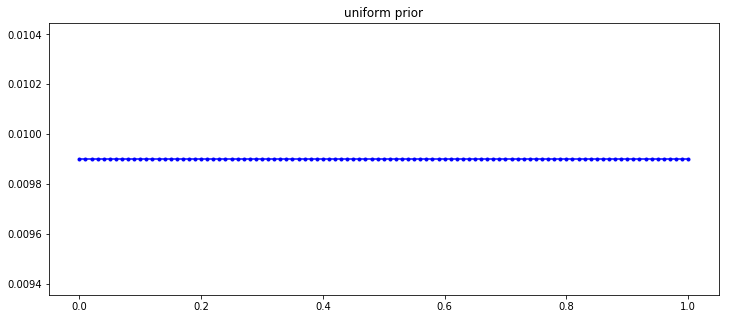

In [8]:

plt.figure(figsize=(12,5))
bayes = Bayes(p_priors.copy(), coin_likelihood)
bayes.plot(title="uniform prior", color='b', marker='.', linestyle=None)

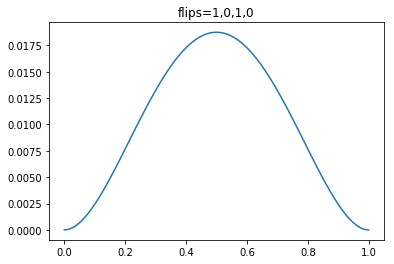

In [9]:
bayes.update(1) 
bayes.update(0) 
bayes.update(1)
bayes.update(0)

bayes.plot(title="flips=1,0,1,0")

Let's create a function to do that nicely...

In [10]:
def feed_bayes_and_plot(bayes, data_sequence):
    N = len(data_sequence)
    
    fig, axs = plt.subplots(1, N, figsize=(16, 3))
    
    # for each new data point
    for i, ax in enumerate(axs.flatten()):
        bayes.update(data_sequence[i])
        sorted_keys = sorted(bayes.prior.keys())
        sorted_probs = [bayes.prior[key] for key in sorted_keys]
        ax.plot(sorted_keys, sorted_probs)
        ax.set_title(",".join(map(str,data_sequence[0:i+1])))
        ax.get_yaxis().set_ticks([])
        if i==0:
            ax.set_ylabel('pdf')
        ax.set_xlabel('p')

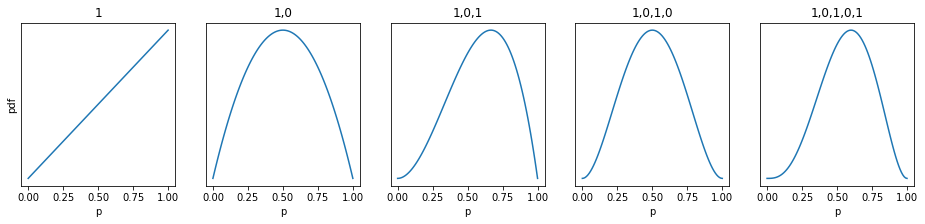

In [11]:
flips_A = [1,0,1,0,1]

bayesA = Bayes(p_priors.copy(), coin_likelihood)
feed_bayes_and_plot(bayesA, flips_A)

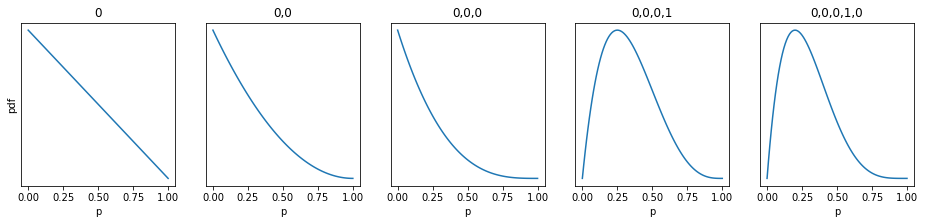

In [12]:
flips_B = [0,0,0,1,0]

bayesB = Bayes(p_priors.copy(), coin_likelihood)
feed_bayes_and_plot(bayesB, flips_B)

In [13]:
import scipy.stats as scs

In [14]:
clicks_A, views_A, clicks_B, views_B = 46, 100, 35, 100
# let's draw values from those distribution models
simulation_size = 10000

# model for A, fed with the right values
A_model = stats.beta(1 + clicks_A, 1 + views_A - clicks_A)

# model for B, fed with the right values
B_model = stats.beta(1 + clicks_B, 1 + views_B - clicks_B)

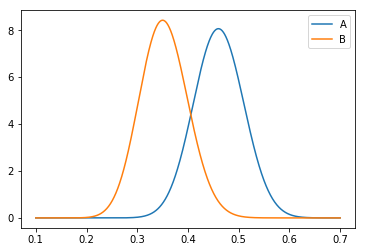

In [15]:
xx = np.linspace(0.1,.7,1000)
plt.plot(xx,A_model.pdf(xx), label='A')
plt.plot(xx,B_model.pdf(xx), label='B')
plt.legend();

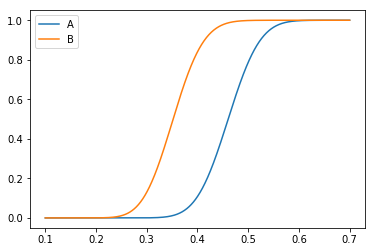

In [16]:
xx = np.linspace(0.1,.7,1000)
plt.plot(xx,A_model.cdf(xx), label='A')
plt.plot(xx,B_model.cdf(xx), label='B')
plt.legend();

In [17]:
A_sim = A_model.rvs(size=simulation_size) 
B_sim = B_model.rvs(size=simulation_size)

In [18]:
# let's find out the probability that A is better than B
print((A_sim > B_sim).mean())

# we can also find the probability that p_A is larger than p_B by 0.05
print((A_sim > (B_sim + 0.05)).mean())

0.9431
0.8046


In [19]:
np.random.choice(['a', 'b', 'c'], size=30, p=[0.8, 0.1, 0.1])

array(['a', 'c', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'c', 'a',
       'c', 'a', 'a', 'a', 'a', 'c', 'a', 'a', 'a', 'a', 'a', 'b', 'a',
       'a', 'c', 'a', 'a'],
      dtype='<U1')

In [20]:
foo = np.array([2,5,1,7,9,6,3,2,5,8])

In [21]:
foo

array([2, 5, 1, 7, 9, 6, 3, 2, 5, 8])

In [22]:
foo[[1,1,1,4, 4, 4, 4]]

array([5, 5, 5, 9, 9, 9, 9])

In [23]:
bar = np.arange(10)

In [24]:
bar

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [25]:
foo > bar

array([ True,  True, False,  True,  True,  True, False, False, False, False], dtype=bool)

In [26]:
np.mean(foo > bar)

0.5

In [27]:
np.sum(foo>bar)

5

In [28]:
mask = foo > bar

In [29]:
mask

array([ True,  True, False,  True,  True,  True, False, False, False, False], dtype=bool)

In [30]:
foo[mask]

array([2, 5, 7, 9, 6])